<a id='top'></a>


# CSCI3022 S23


# Homework 11: Modeling Using Regression
## Due Monday, May 1st at 11:59pm to Gradescope
Late Due Date:  Thursday, May 4th (last day of classes), 11:59pm MT
***

**Name**: ____Owen Kutzscher_______________________________

***

***
### Collaboration Policy

While completing the assignment you are not allowed to consult any source other than the course textbooks/online reference links provided on Canvas, your own class notes, and/or the posted lecture slides/in-class Jupyter notebooks.   You may discuss questions you have with your classmates or on Piazza or in office hours, but all work you submit must be your own, which means when writing up your solutions or code, you MUST do it entirely by yourself. 

You should be able to easily reproduce from scratch and explain a solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam without referencing your notes/book/HW.   


**Do not search/ask for a solution online**: You may not actively search for a solution to the problems below from the internet. This includes posting to or using sources like ChatGPT, StackOverflow, StackExchange, Reddit, Chegg, CourseHero, etc.  

**We are here to help!  Visit HW Hours and/or post questions on Piazza!**


Copying/consulting from the solution of another classmate or an online solution (or providing a classmate your solution) constitutes a **violation of the course's collaboration policy and the honor code and will result in an F in the course and a trip to the honor council**.   






### Instructions for Submitting in Correct Format 

You must submit a PDF of this Juptyer notebook to Gradescope by the deadline listed above.  Submissions that are not a PDF or that are not submitted to Gradescope will not be counted for credit.  

$\color{red}{\text{Before submitting your PDF, make sure that your LaTeX has rendered correctly in your PDF.}}$
$\color{red}{\text{Any of your solutions with incorrectly rendered or incompletely rendered LaTeX will be given 0 points.}}$ 

- There are several ways to quickly make a .pdf out of this notebook for Gradescope submission.  
 
 - If you are running Juptyer locally on your computer: 
 
     - Option1 : Select Kernel->Restart & Run All.  Then select File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"
 
     - Option 2: Select Kernel->Restart & Run All.   Then select File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 
 - If you are running using CSEL: 
 
     - Option1 :  Go to File ->Save & Export Notebook As-> HTML.  Then open the HTML, and then Right-Click -> Print and select "Print to PDF".  
     - Option2 :  Go to File ->Download. Then use this converter https://htmtopdf.herokuapp.com/ipynbviewer/ to convert ipynb to pdf.
 
### Notes
- For full points you must correctly match your questions to the respective Gradescope problem, and include clear comments in your code.   Please note that any LaTeX that is not correctly rendered in your submitted PDF will result in a 0 on the entire problem(s) that involves the unrendered LaTeX. 
- You **must show all work and justify ALL answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Any relevant data sets are available on Canvas. 
- LaTeX Tips:  Here is a [reference guide] (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).  **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 

- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.




We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 


In [1]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
from scipy.stats import skew, kurtosis, norm
import seaborn
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import MultiComparison
import random



For this entire assignment you are welcome to use any built-in methods/functions we have used in class.  If a built-in function/method outputs summary statistics or other useful output variables you can use that output directly when answering any questions below UNLESS otherwise specified in the problem (i.e. unless we tell you in the problem to write code to calculate a particular statistic from scratch based on its definition, you can just get that statistic/info from the output of a built-in method/function).

<a id='p1'></a>
# Problem 1 (15 pts)
***
Your friend owns a franchise business that sells and rents stand-up paddleboards.  
They have collected data from 95 of their shops and have asked you to create a model that predicts annual sales from their data.  The data is in the file `paddle.csv`

 ***Import the data set `paddle.csv`, and take a look at it.***

In [2]:
dfPaddle = pd.read_csv("paddle.csv")

dfPaddle

,lakes,pop,advertising,competitors,sales
0,1,63,4.3,1,14.1
1,1,25,10.8,2,19.0
2,1,40,11.8,2,19.8
3,1,89,9.6,0,19.9
4,1,33,6.4,2,22.4
...,...,...,...,...,...
90,8,96,3.4,8,11.8
91,8,37,3.6,9,12.7
92,8,75,7.5,9,17.2
93,8,31,11.5,9,19.5


### Data Description:
The data file contains the following data for each of the 95 shops:

`lakes` -  The number of lakes or reservoirs within a 50 mile radius of the shop.

`pop` - Population density of the town where the shop is located (people per square mile).

`advertising` - The shop's annual amount spent on advertising/promotions (in thousands of dollars).

`competitors` - The number of competing stores within a 50 mile radius of the shop.

`sales` - The shop's annual net sales revenue (in thousands of dollars).

## Single-Predictor Regression



### [1] Part A) A naive model (8 pts)

Your friend says that since stand-up paddleboarding is a water activity, they would expect annual sales revenue to be dependent on the number of lakes/reservoirs in the region near a given shop.  

Your task: 
- ***(1A i) (2 points):  Make a simple linear regression (SLR) model with `sales` as the response, predicted by the variable `lakes`.***    

- ***Print the summary output for the model***

- ***Then write the equation for the model in a markdown cell.***



In [3]:
lmPaddle=sm.OLS(dfPaddle['sales'], sm.add_constant(dfPaddle['lakes'])).fit()
print(lmPaddle.summary())
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(lmPaddle.params[0], lmPaddle.params[1]))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.20
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000459
Time:                        21:51:58   Log-Likelihood:                -295.44
No. Observations:                  95   AIC:                             594.9
Df Residuals:                      93   BIC:                             600.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6338      1.224     20.120      0.0

Y = 24.6 + -0.97x

 - ***(1A ii) (2 points) Make the following 4 plots (described below).  
Title each plot and label your axes on each plot.*** 

  - ***Scatter plot of the data (i.e. lakes vs sales) and overlay the simple linear regression line you found above***.  

  - ***Frequency histogram of residuals of your SLR model.***  
  
  - ***A Q-Q plot of *residuals*, comparing to a normal distribution.***
  - ***Scatter plot where the lake data values are the x-axis and the model residuals are the y-axis.***


Figure(640x480)


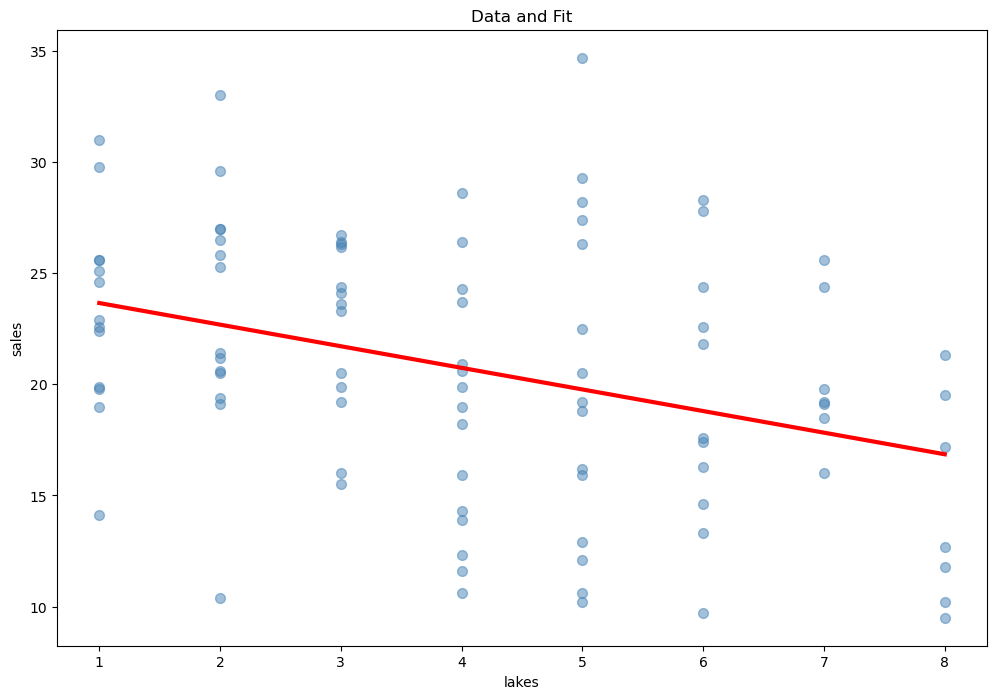

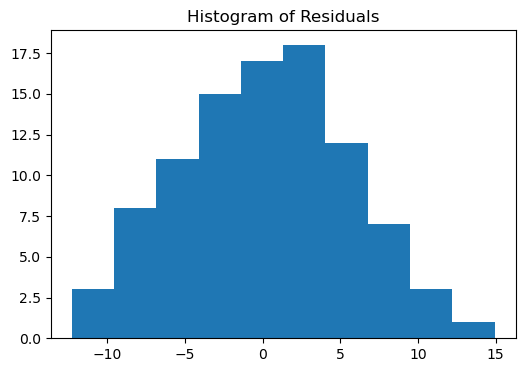

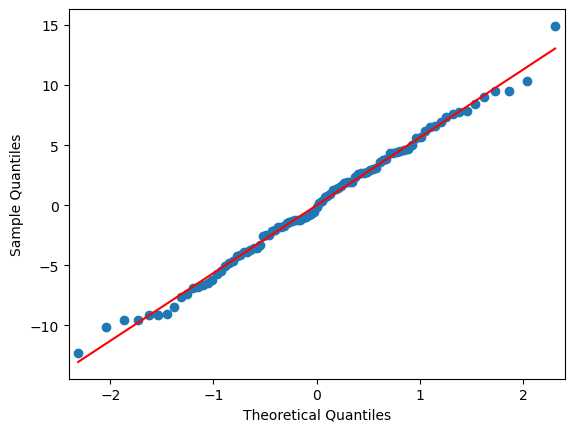

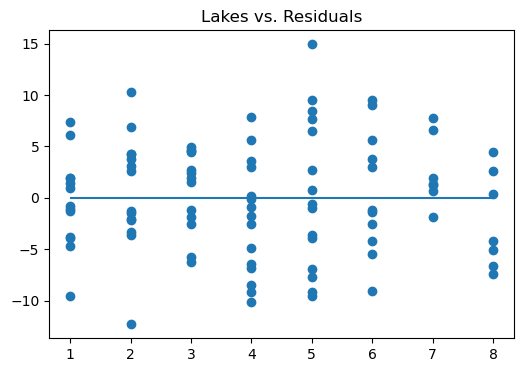

In [4]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(dfPaddle['lakes'], dfPaddle['sales'],color="steelblue", alpha=0.5, s=50)
ax.plot( dfPaddle['lakes'], lmPaddle.fittedvalues,color='red',lw=3)
ax.set_xlabel('lakes')
ax.set_ylabel('sales')
ax.set_title('Data and Fit')




fig, ax= plt.subplots(figsize=(6,4))

ax.hist(lmPaddle.resid)
ax.set_title('Histogram of Residuals')






print(sm.qqplot(lmPaddle.resid,line='q'))





fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(dfPaddle["lakes"], lmPaddle.resid)
ax.set_title('Lakes vs. Residuals')
ax.hlines(0, xmin=np.min(dfPaddle['lakes']), xmax=np.max(dfPaddle['lakes']))

 - ***(1A iii). (2 points) Does this model seem appropriate?  For each of the 4 major assumptions of a simple linear regression model, use your plots in part (ii) to decide whether or not the dataset meets those assumptions.***





1. Linear function: YES (from graph 1), slight downward trend.

2. Errors are independent: YES (from graph 4), The data appears reletively evenly spaced around the y=0 line.

3. Errors normally distributed: YES (from graph 2), I think the data appears reletively normal. (rom graph 3), the data appears reletively on the qq plot line.

4. Errors have equal variances: YESish (from graph 4), this data appears reletively evenly spaced around the central line, but it has a little bit of variability with how close it is to this central line...


CONCLUSION: The data meets the assumptions, so the model is appropriate.
BUT it seems weird that if there are more lakes near a certain store, they generally make less money....

 - ***(1A iv) (1 pt) What is the meaning of the slope in the model in terms of the variables in the dataset?  Based on the physical meaning of the variables, does the value of this slope seem reasonable or does it surprise you?  Explain.***


slope: sales per lake, sales/lake

- ***(1A v) (1 pt) Using the summary output from your model, what percent of total variation in sales revenue can be explained by the number of nearby lakes/reservoirs? Explain.***

this is the $R^2$ value, so 12.45%

### [1] Part B: Statistical Inference Using your Model  (7 pts)
***Your friend would like to know if there's sufficient evidence from this model to conclude that the number of nearby lakes/reservoirs is a statistically significant linear predictor of sales revenue.  You decide to do a hypothesis test at the  $\alpha = 0.05$ significance level.***

- ***(1C i). (1 points)  State the null and alternate hypotheses for your test.***


$H_0: \beta = 0$ , lakes do not affect number of sales

$H_A: \beta \neq 0$ , lakes do affect number of sales

 - ***(1C ii). (2 points) Using the summary output from your model, what is the conclusion of your test?  Explain what output you used (i.e. exactly what part of the table did you use)  and justify your answer.***


I would use the P value which is noticibly way smaller than 0.05. (its 0.000)

But lets use the confidence interval to be sure. The CI doesn't inclue 0 so we can reject our $H_0$ and accept our $H_A$



 - ***(1C iii) (2 pts)  Your friend is considering opening another shop in a new location with 5 nearby lakes.  What is the $90\%$ prediction interval for the annual sales revenue for a shop with 5 nearby lakes?  Your friend has not taken statistics before, so interpret what this means in words your friend can understand.***  



In [5]:

# Inspect the results
xgrd1=np.linspace(0,10,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:
predictions1 = lmPaddle.get_prediction(np.array([1,5]))

#
#sm.add_constant(xgrd)
predictions1.summary_frame(alpha=0.1)



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.772263,0.615846,18.749095,20.795432,10.606334,28.938192


Hi there friend. If you set up a paddle shop with 5 lakes nearby, I'll PREDICT theres a 90% chance that your shop's revenue falls within the range of [10.6, 28.9] thousand dollars.


 - ***(1C iv)  (2 pts) Create one plot with the original data, the model, and the $90\%$ prediction and confidence bands for the model***




                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.20
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000459
Time:                        21:51:58   Log-Likelihood:                -295.44
No. Observations:                  95   AIC:                             594.9
Df Residuals:                      93   BIC:                             600.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6338      1.224     20.120      0.0

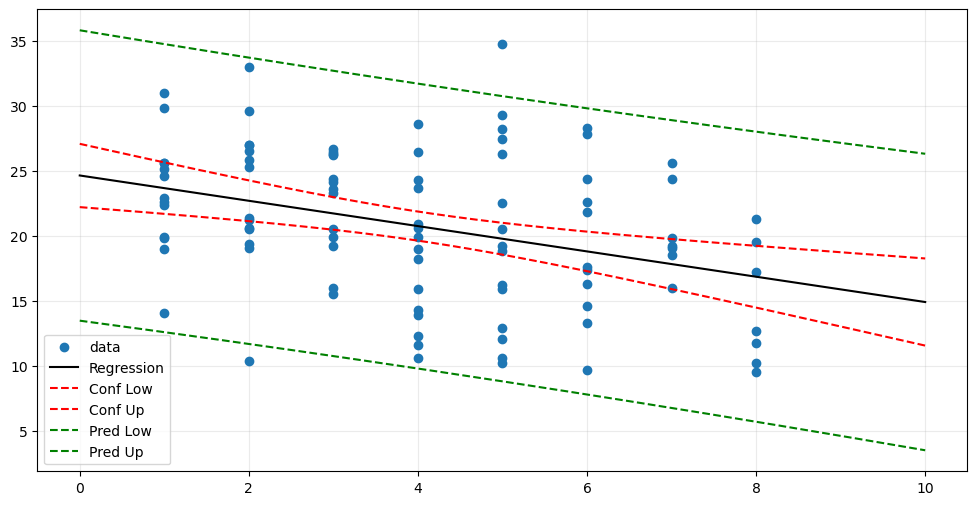

In [6]:
# Inspect the results
xgrd=np.linspace(0,10,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:
predictions = lmPaddle.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(alpha=0.05)





#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.scatter(dfPaddle['lakes'], dfPaddle['sales'], label='data')



#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

print(lmPaddle.summary())

<a id='p2'></a>
#  Problem 2: Go Big-  Multiple Linear Regression (35 pts)

***


You feel unsatisfied with the results from the model in Problem 1.    

Problem 2 will involve steps to improve your model from Problem 1 using Multiple Linear Regression (MLR).  

We will continue working with the same dataset from Problem 1 (paddle.csv) throughout this problem.



In an effort to improve the model from Problem 1, you decide to add in one additional predictor.  To determine which predictor to add next you start with some scatterplots of the dataset.  


### [2] Part A:  Explore (5 pts)

 - ***(2A i). (1 point) Use the function `seaborn.pairplot` to create pairwise scatterplots of the continuous predictors/covariates in the paddle.csv data, both against each other and against the outcome (sales). https://seaborn.pydata.org/generated/seaborn.pairplot.html***

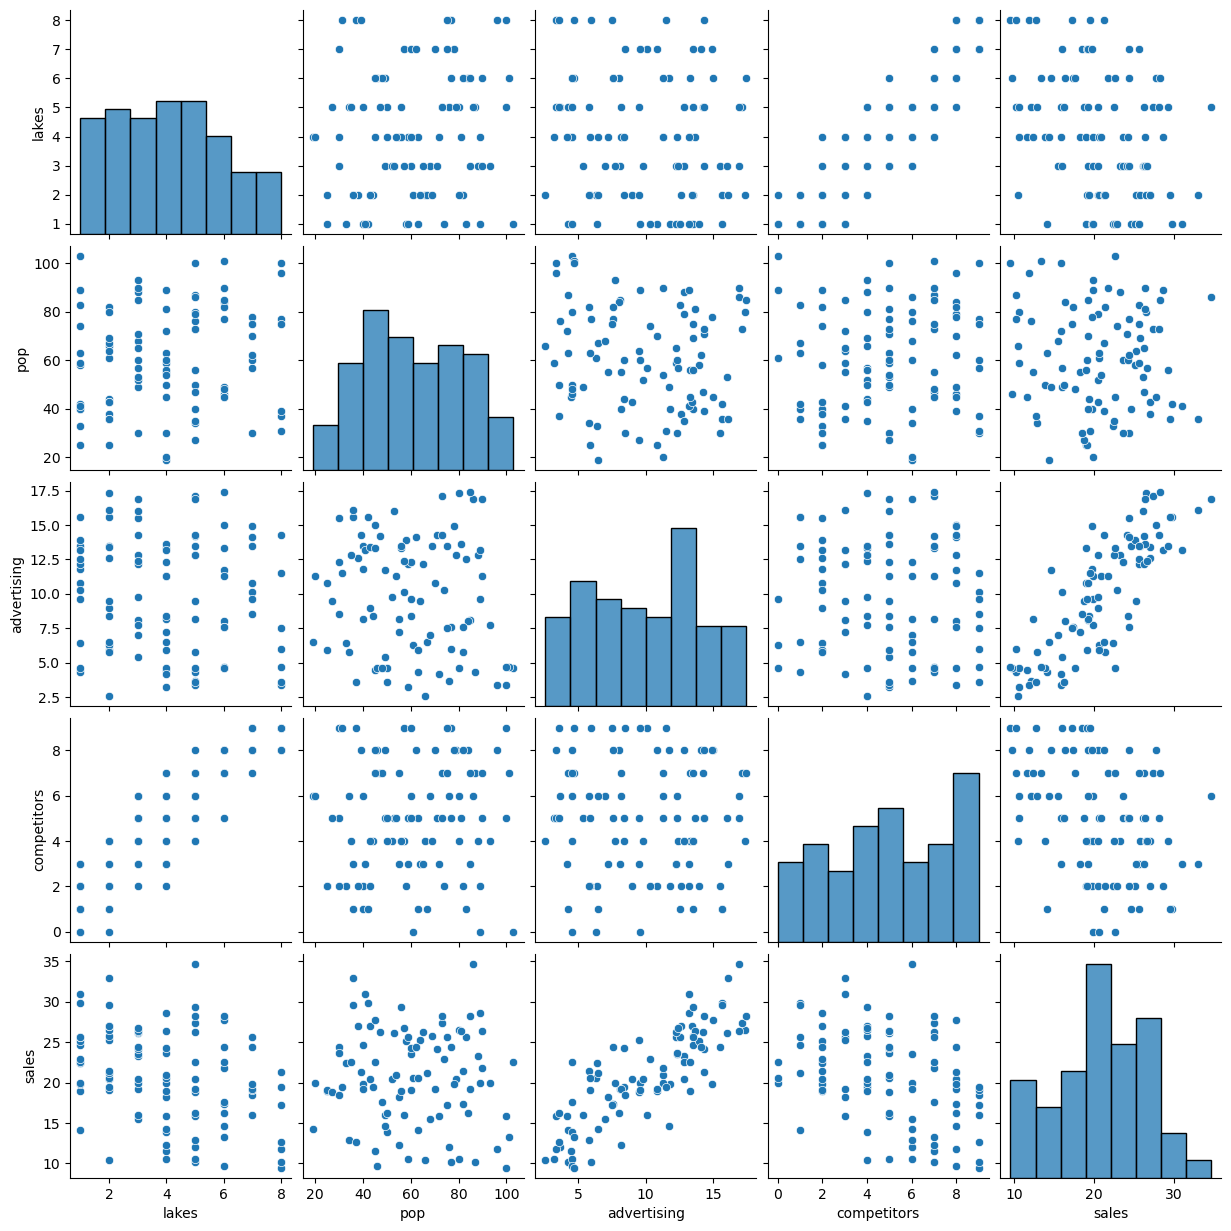

In [7]:
seaborn.pairplot(dfPaddle)

 - ***(2A ii). (2 points)  Based on your scatterplots, which (if any) explanatory variable(s) appear to have a linear relationship with sales revenue?  Explain.***     

lakes and compeditors, advertising and sales, (Maybe... lakes and sales, compeditors and sales)


 - ***(2A iii). (2 points)  Print the correlation matrix.  Are any of the ****explanatory**** variables strongly correlated with one another?  If so, which ones?***

In [8]:
dfPaddle[['lakes', 'pop','advertising','competitors','sales']].corr()

,lakes,pop,advertising,competitors,sales
lakes,1.000000,0.138156,-0.128524,0.895413,-0.352528
pop,0.138156,1.000000,-0.114839,0.080539,-0.063142
advertising,-0.128524,-0.114839,1.000000,-0.079184,0.824864
competitors,0.895413,0.080539,-0.079184,1.000000,-0.377028
sales,-0.352528,-0.063142,0.824864,-0.377028,1.000000


Strongly correlated variables: 
Lakes to compeditors (0.90), advertising to sales (0.82)

### [2] Part B: Adjust the Model (5 pts)

***(2B i).  (1 pt) Choose one additional explanatory variable to add to your model, based on your exploratory analysis in Part 2A.  Explain your reasoning for the variable you have chosen.***



***(2B ii). (2 points) Create a Multiple Linear Regression Model with `sales` as the dependent variable, `lakes` as one of the independent variables and the new variable you have chosen as the other independent variable.***  

***Print the model output summary table for this new model, and then write the equation for this new model in a markdown cell.***

In [9]:
# lets use Compeditors. It should correlate heavily with lakes and a bit (-0.38) with sales.


lmPaddle2=sm.OLS(dfPaddle['sales'], sm.add_constant(dfPaddle[['lakes', 'competitors']])).fit()
print(lmPaddle2.summary())

# well its not correlating that heavily tbh...


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.693
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000814
Time:                        21:52:03   Log-Likelihood:                -294.39
No. Observations:                  95   AIC:                             594.8
Df Residuals:                      92   BIC:                             602.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.0756      1.256     19.961      

$y=25 - 0.21x_{lakes} - 0.71x_{compeditors}$


***(2B iii). (2 points) Create a 3D plot of your data AND your model (i.e. you should have a plane that represents your model and a scatter plot that represents your data). Label your axes.***

   lakes  pop  advertising  competitors  sales
0      1   63          4.3            1   14.1
1      1   25         10.8            2   19.0
2      1   40         11.8            2   19.8
3      1   89          9.6            0   19.9
4      1   33          6.4            2   22.4


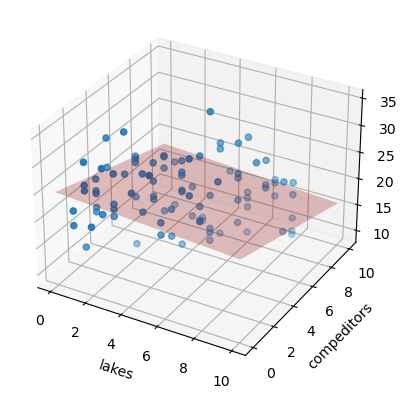

In [10]:
# # importing required libraries
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
 
# # creating figure
# fig = plt.figure()
# ax = Axes3D(fig)
 
# # creating the plot
# plot_geeks = ax.scatter(dfPaddle['competitors'], dfPaddle['lakes'],dfPaddle['sales'],  c = "g")
 
# # setting title and labels
# ax.set_title("3D plot")
# ax.set_xlabel('competitors')
# ax.set_ylabel('lakes')
# ax.set_zlabel('sales')
# plt.title("3D Main")
 
# x = np.linspace(0, 300, 100)
# y = np.linspace(0, 50, 100)

# x, y = np.meshgrid(x, y)

# #Enter the linear model equation here:
# eq = -0.2078 * x + -.7172 * y + 25.0756



# ax.plot_surface(x, y, eq, color='red', alpha=0.25)    
    
# # displaying the plot
# plt.show()




import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(dfPaddle.head())
# dfPaddle['competitors'] = dfPaddle.High - dfPaddle.Low
# dfPaddle['lakes'] = pd.rolling_mean(dfPaddle['sales'], 100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# threedee = plt.figure().gca(projection='3d')
ax.scatter(dfPaddle['lakes'], dfPaddle['competitors'], dfPaddle['sales'])

ax.set_xlabel('lakes')
ax.set_ylabel('compeditors')
ax.set_zlabel('sales')
# plt.show()





 
x = np.linspace(0, 10, 40)
y = np.linspace(0, 10, 50)

x, y = np.meshgrid(x, y)

#Enter the linear model equation here:
eq = -0.2078 * x + -.7172 * y + 25.0756



ax.plot_surface(x, y, eq, color='red', alpha=0.25)    
    
# displaying the plot
plt.show()

### [2] Part C: Inference on MLR Model: Step 1 ( 7 pts)

Let's check that this model meets the assumptions for multiple linear regression.  

***(2C i) Make the following 4 plots (2 pts):***

 -  A histogram of *residuals* of best least-squares fit.

 -  A Q-Q plot of *residuals*, comparing to a normal distribution.

 -   A scatter plot where the `lake` data values are the x-axis and the *residuals* are the y-axis.

 -  A scatter plot where the $x$-axis is the data for the other variable you chose to include in the model and *residuals* are the y-axis.




Figure(640x480)


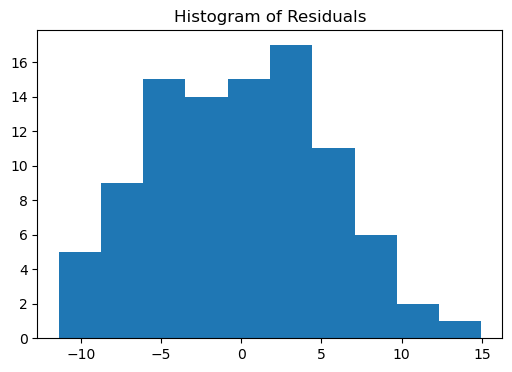

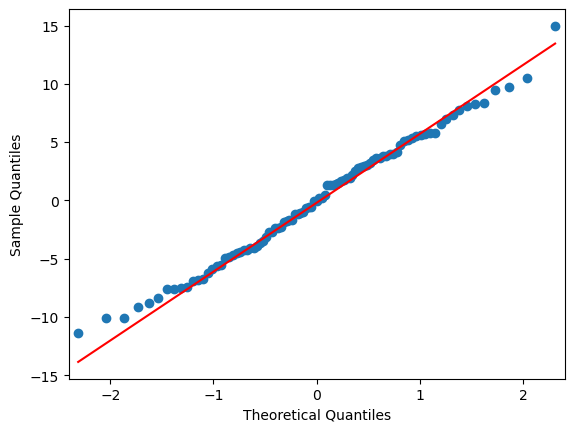

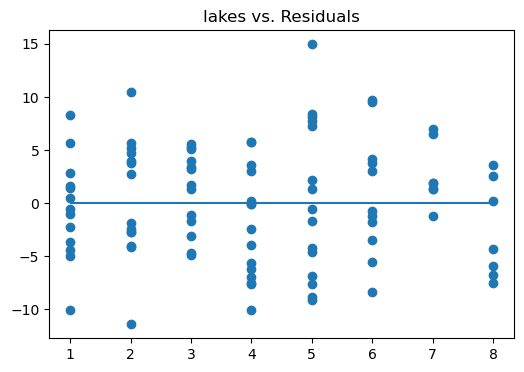

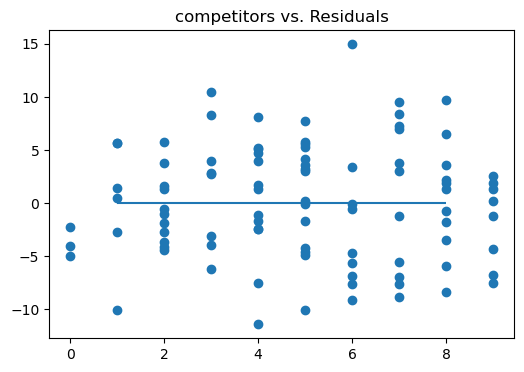

In [11]:


fig, ax= plt.subplots(figsize=(6,4))

ax.hist(lmPaddle2.resid)
ax.set_title('Histogram of Residuals')






print(sm.qqplot(lmPaddle2.resid,line='q'))





fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(dfPaddle["lakes"], lmPaddle2.resid)
ax.set_title('lakes vs. Residuals')
ax.hlines(0, xmin=np.min(dfPaddle['lakes']), xmax=np.max(dfPaddle['lakes']))

fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(dfPaddle["competitors"], lmPaddle2.resid)
ax.set_title('competitors vs. Residuals')
ax.hlines(0, xmin=np.min(dfPaddle['lakes']), xmax=np.max(dfPaddle['lakes']))

***2C ii). (2 pts)   What are the major assumptions of a multiple linear regression model?  For each of these assumptions, use your plots above to decide whether or not the data set meets those assumptions. Explain your reasoning.***



1. Linear function: YES (from graph 1), data appears to be correlated around the line best fit

2. Errors are independent: YES (from graph 4, 5), The data appears reletively evenly spaced around the y=0 line.

3. Errors normally distributed: YES (from graph 2), I think the data appears reletively normal. Also, (from graph 3), the data appears reletively on the qq plot line.

4. Errors have equal variances: YESish (from graph 4), this data appears reletively evenly spaced around the central line


CONCLUSION: The data meets the assumptions, so the model is appropriate.

***Let's see if this new model as a whole is significant at an alpha level of  5%.  In other words, we want to use a single test to see if at least one of the two explanatory variables really has a significant linear association with the response variable.***  

 - ***(2C iii). (1 point)  State the null and alternate hypotheses we should test at an alpha level of  5% , and explain what they mean in a sentence.***
 

$H_0: \beta = 0$, compeditors and lakes have no effect on the sales

$H_A: \beta \neq 0$, compeditors and lakes have an effect on the sales



 - ***(2C iv). (2 points) Use the output of your model to determine the conclusion of this test. Explain what output you used.***

In [12]:
# I used the outputs for the rows "lakes" and "competitors", and then the column P > |t|

Our p values are .729 .157 for lakes and competitors rEsPeCtiVEly. These are far above our alpha value of 0.05. So we will fail to reject our $H_0$, and reject our $H_A$.

### [2] Part D: Inference on MLR Model: Step 2 (4 pts)

After Part 2C, you should have found that the new model as a whole is significant. So, it will be helpful to know exactly which variable (or variables) have a significant linear association with the response variable.  

 - ***(2Di). (2 points) This will require multiple tests.  State the null and alternate hypotheses we should test at an alpha level of  5% , and explain what they mean in a sentence.***






$H_0: \beta = 0$, compeditors have no effect on the sales

$H_A: \beta \neq 0$, compeditors have an effect on the sales


Then...

$H_0: \beta = 0$, lakes have no effect on the sales

$H_A: \beta \neq 0$, lakes have an effect on the sales


 - ***(2Dii). (2 points) Explain the conclusion(s) of these tests for each of the explanatory variables in your model, using output from your model summary table.
(Note: For this part of the problem you do not need to calculate each test statistic from scratch- instead you can just look up the appropriate results from the output summary table and explain your conclusions below).***


Our p values are .729 .157 for lakes and competitors rEsPeCtiVEly. These are far above our alpha value of 0.05. So we will fail to reject our $H_0$, and reject our $H_A$ (for both variabes).

If we want to force one to be signifigant, we can say that "competitors" has a much lower p value and is therefore more likley than "lakes" have the model give some sort of correlation (positiv or negative).

### [2] Part E: Quantifying Model Goodness of Fit (3 pts)

***In general, adding more variables to our model will always increase the percent of total variation in the dependent variable that can be explained with the model.  However this comes at a cost.  
(2E i)  (2 pts) What is at least one potential problem with using all the explanatory variables available in your dataset to fit a model?***

No ability to easily vsualize. Many variables may be entirely uncorrelated and skew our data in unpredictable directions.

**(2E ii). (1 pt)  What is the name of the metric that measures how much total variation is explained by our model but adds a penalty to this number for each additional variable we add.     Use your summary model output to find the value of this metric for your new model.  Is this an improvement compared to your answer from Part (1A v)?***


ajusted $R^2$: 0.125

Yes
1A: 0.115

### [2] Part F: Final Pass at a Model  (6 pts)


You are curious if the model you found above is really the best you can do with the dataset.  

In this open-ended problem you will use the same dataset (paddle.csv) but you may use any subset of the columns to build your "best" Multiple Linear Regression model.  i.e. you want to create the best model you can to quantify how sales can be explained and predicted by the features in this dataset.

For this problem the dependent variable will still be sales.  Any other variables will be candidates for explanatory variables.  


Your goal is to demonstrate that you have an understanding of how to choose between columns and validate/check for issues in a multiple linear regression problem.

 - ***(2F i). (4 pts)  By adding variables step-by-step to a minimal model or by removing variables step-by-step from the full model, use one or more of the criteria covered in our class to create a reasonable candidate model (i.e. the "best" you can do with the data given). The criteria you use may include (but are not limited to):***
 
  - ***adjusted $R^2$***
  - ***inclusion/removal of most or least-significant t-tests on coefficients***
  - ***F-tests to compare between models***
  - ***Comparison of AIC between models***
  
 
***In addition to code showing the model variations you try, use markdown cell(s) to write-up an explanation of your reasoning for each step of this process as you construct a final version of the model.***

***Your explanation should include the results (from the output summary) of the F-test and t-tests for your final model. If you choose to include an insignificant explanatory variable in your final model you must fully justify your reasoning.*** 

  


In [13]:
# I'm g on this hw thb.

 - ***(2F ii).  (2 pts) Give the equation for your final model (in markdown) AND interpret the meaning of the intercept and coefficients in your final model in the context of the problem.   Explain how your final model makes sense in the context of the problem (or if it doesn't, you'll want to try to explain why not).*** 


### [2] Part G: Back To Your Friend (5 pts)

After finishing your final model, you report the results to your friend.  Your friend asks you to answer the following questions:  
 
 
 - ***2G i). (2 pt) Provide 95% confidence intervals for each of the coefficients in your final model from Part F (you can use the summary table to find these and you do not need to provide a confidence interval for the intercept).  Since your friend is rusty at statistics, write an explanation/ interpretation of what each of the confidence intervals mean in the context of this dataset.*** 
 

 - 2Gii). ***(2 pts) Your friend is thinking of opening a new paddleboard shop in a town with population density of 75 people per square mile.  The town has 4 lakes nearby and currently only 2 nearby competitors. Use your model from Part F to give a $95\%$ prediction interval for the expected first year sales revenue at this new store if they spend $\$8000$ on advertising in the first year.*** 

- ***2Giii). (1 pt) Is there any other data (i.e. other possible explanatory variables) you recommend your friend gather in the future to possibly improve the model of sales revenue?  Explain.***  

Selected Answers:
Coming soon!